In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# import 
# np.random.seed(1000)

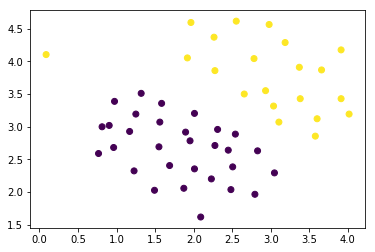

In [3]:
data1 = scipy.io.loadmat('ex6data1.mat')
X1 = data1['X']
y1 = data1['y']
y1 = y1.ravel()
# color = {1: 'y', 0: 'b'}

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1)
plt.show()

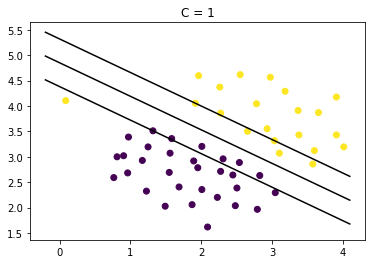

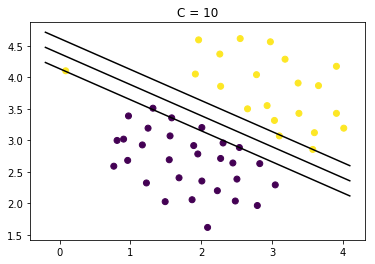

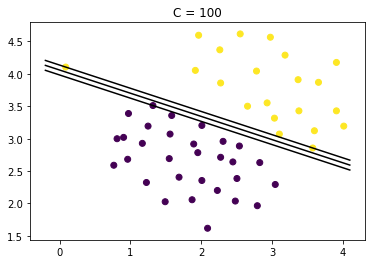

In [4]:
Cs = [1, 10, 100]
for C in Cs:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X1, y1)
#     print(clf.n_support_)
#     print(clf.support_vectors_)
#     print(clf.dual_coef_)
#     print(clf.support_)
    
    w = clf.coef_.reshape(-1, 1)
    b = clf.intercept_[0]
#     print(w, b)
    w0 = w[0]
    w1 = w[1]
    # print(w[0], w[1])
    plt.subplots()
    plt.title('C = {}'.format(C))
    xplot = np.arange(-.2, 4.2, .1)
    plt.plot(xplot, -(w0*xplot + b)/w1, 'k-')
    plt.plot(xplot, -(w0*xplot + b + 1)/w1, 'k-')
    plt.plot(xplot, -(w0*xplot + b - 1)/w1, 'k-')

    plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1)
    plt.show()
    

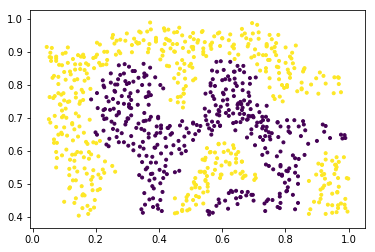

In [5]:
data1 = scipy.io.loadmat('ex6data2.mat')
X2 = data1['X']
y2 = data1['y']
y2 = y2.ravel()
# color = {1: 'y', 0: 'b'}

plt.scatter(X2[:, 0], X2[:, 1], marker='.', c=y2)
plt.show()

In [6]:
print(X2[:10])

[[0.107143  0.60307  ]
 [0.093318  0.649854 ]
 [0.0979263 0.705409 ]
 [0.15553   0.784357 ]
 [0.210829  0.866228 ]
 [0.328341  0.929094 ]
 [0.429724  0.934942 ]
 [0.620968  0.934942 ]
 [0.756912  0.910088 ]
 [0.819124  0.879386 ]]


In [7]:
def GaussianKernel(x1, x2, sigma):
    return np.exp(-np.linalg.norm(x1-x2)**2/ (2*sigma**2))

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
GaussianKernel(x1, x2, sigma)

0.32465246735834974

In [9]:
X = np.random.randn(3, 2)
print(X)
clf.predict(X)

[[ 0.80386514  0.53453061]
 [-1.2380122   0.39890208]
 [ 0.38196412  0.22073403]]


array([0, 1, 0], dtype=uint8)

In [17]:
C = 100
clf = SVC(kernel='rbf', C=C, gamma=10)
clf.fit(X2, y2)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[-0.0050691  0.352632 ]
 [-0.0030691  0.352632 ]
 [-0.0010691  0.352632 ]
 [ 0.0009309  0.352632 ]
 [ 0.0029309  0.352632 ]]


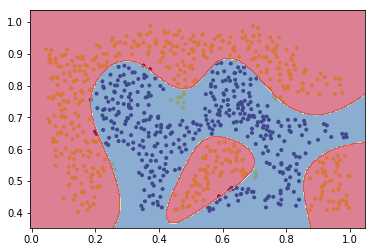

In [25]:
xmin, xmax = X2[:, 0].min() - .05, X2[:, 0].max() + .05
ymin, ymax = X2[:, 1].min() - .05, X2[:, 1].max() + .05
xx, yy = np.meshgrid(np.arange(xmin, xmax, .002), np.arange(ymin, ymax, .002))
# xx = xx.reshape(-1, 1)
# yy = yy.reshape(-1, 1)
grid = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), axis=1)
print(grid[:5])
z = clf.predict(grid)
z = z.reshape(xx.shape)
# print

plt.scatter(X2[:, 0], X2[:, 1], marker='.', c=y2)
plt.contourf(xx, yy, z, alpha=.6, cmap=plt.cm.Spectral_r) #cmap=plt.cm.Spectral
plt.show()

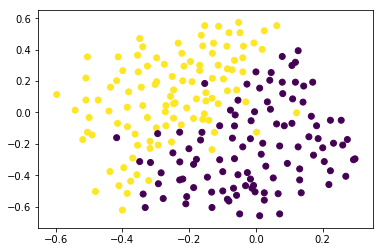

In [30]:
data = scipy.io.loadmat('ex6data3.mat')
X3 = data['X']
y3 = data['y']
Xval = data['Xval']
yval = data['yval']
y3 = y3.ravel()
# color = {1: 'y', 0: 'b'}

plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=y3)
plt.show()

In [41]:
value = [.01, .03, .1, .3, 1, 3, 10, 30]
acc_max = 0

for C in value:
    for gamma in value:
#         print('###########')
#         print('C = {0}, gamma = {1}'.format(C, gamma))
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X3, y3)
        pred = clf.predict(Xval)
        acc = np.mean(pred == yval)
        if acc > acc_max:
            acc_max = acc
            clf_opt = clf
#         print('Acc: %.2f'%(100*acc))

In [42]:
clf_opt

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[-0.646774 -0.707895]
 [-0.644774 -0.707895]
 [-0.642774 -0.707895]
 [-0.640774 -0.707895]
 [-0.638774 -0.707895]]


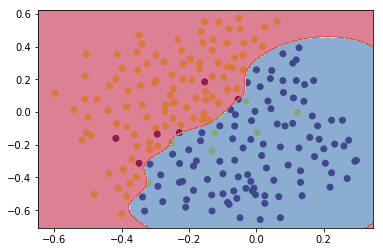

In [43]:
xmin, xmax = X3[:, 0].min() - .05, X3[:, 0].max() + .05
ymin, ymax = X3[:, 1].min() - .05, X3[:, 1].max() + .05
xx, yy = np.meshgrid(np.arange(xmin, xmax, .002), np.arange(ymin, ymax, .002))
# xx = xx.reshape(-1, 1)
# yy = yy.reshape(-1, 1)
grid = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), axis=1)
print(grid[:5])
z = clf.predict(grid)
z = z.reshape(xx.shape)

plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=y3)
plt.contourf(xx, yy, z, alpha=.6, cmap=plt.cm.Spectral_r)
plt.show()

In [17]:
ids = np.random.permutation(range(len(y)))
X_train = X[ids]
y_train = y[ids]
print(y_train[:20])

[1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0]


In [18]:
X_train = np.concatenate((np.ones((X.shape[0], 1)), X_train), axis=1)
print(X_train.shape)

(51, 3)


In [26]:
w_init = np.zeros((X_train.shape[1], 1))
def SVM(X, y, C):
    ld = 1./C
    #initialize parameter
    w = w_init
    lr = .1
    epoch = 1000
    
    errors = []
    
    for iter in range(epoch):
        error = 0
        for i, value in enumerate(X):
            #misclass
#             print('Error: {}'.format{error})
            if y[i] * np.dot(X[i], w) < 1:
                w += lr * (np.dot(X[i].T, y[i]) - ld*w)
                error = 1
            else:
                w += lr * (-ld*w)
        errors.append(error)
    

In [28]:
y_train = np.array(y_train).reshape(len(y_train), 1)
SVM(X_train, y_train, C=10)

ValueError: shapes (3,) and (1,) not aligned: 3 (dim 0) != 1 (dim 0)